In [1]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime

# Initialiser le WebDriver (ici pour Chrome, mais tu peux utiliser un autre navigateur)
driver = webdriver.Chrome()

base_url = "https://www.ldlc.com"
url = f"{base_url}/informatique/pieces-informatique/carte-graphique-interne/c4684/"

# Initialiser une liste pour stocker les données
data = []

# Obtenir la date du jour
current_date = datetime.now().strftime("%Y-%m-%d")

while True:
    driver.get(url)
    time.sleep(3)  # Attendre un peu pour que le JavaScript se charge correctement

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    products = soup.find_all('li', class_='pdt-item')

    for product in products:
        # Extraire le nom
        name = product.find('h3', class_='title-3').text.strip()

        # Extraire la description (infos)
        info = product.find('p', class_='desc').text.strip()

        # Extraire le prix
        price_div = product.find('div', class_='price')
        price = price_div.text.strip() if price_div else "N/A"

        # Ajouter les informations à la liste sous forme de dictionnaire
        data.append({"Nom": name, "Infos": info, "Prix": price, "Date": current_date})

    # Trouver le lien "Suivant" pour la pagination
    next_link = soup.find('li', class_='next')

    # Si le lien "Suivant" existe, mettre à jour l'URL pour la page suivante
    if next_link:
        relative_url = next_link.find('a')['href']
        url = base_url + relative_url  # Concaténer l'URL de base avec l'URL relative
    else:
        # Sinon, sortir de la boucle car il n'y a plus de pages
        break

# Fermer le WebDriver
driver.quit()

# Convertir la liste en DataFrame
df = pd.DataFrame(data)

# Afficher le DataFrame
df


,Nom,Infos,Prix,Date
0,ASRock AMD Radeon RX 6600 Challenger D 8GB,8 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expres...,239€95,2024-10-25
1,ASRock AMD Radeon RX 6750 XT Phantom Gaming D ...,12 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expre...,399€95,2024-10-25
2,ASRock AMD Radeon RX 7600 Challenger 8GB,8 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expres...,299€95,2024-10-25
3,ASRock AMD Radeon RX 7600 Phantom Gaming 8GB OC,8 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expres...,349€94,2024-10-25
4,ASRock AMD Radeon RX 7600 Steel Legend 8GB OC,8 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expres...,339€95,2024-10-25
...,...,...,...,...
180,Sapphire PURE AMD Radeon RX 7700 XT 12GB Frost...,12 Go GDDR6 - Dual HDMI/Dual DisplayPort - PCI...,499€95,2024-10-25
181,Sapphire PURE AMD Radeon RX 7700 XT GAMING OC ...,12 Go GDDR6 - Dual HDMI/Dual DisplayPort - PCI...,479€95,2024-10-25
182,Sapphire PURE AMD Radeon RX 7800 XT GAMING OC ...,16 Go GDDR6 - HDMI/Tri DisplayPort - PCI Expre...,619€95,2024-10-25
183,Sapphire NITRO+ AMD Radeon RX 7900 XT Vapor-X ...,20 Go GDDR6 - Dual HDMI/Dual DisplayPort - PCI...,879€95,2024-10-25


In [2]:
df.to_csv("Ldlc_10_25_2024.csv")

C:\Users\vince\AppData\Local\Temp\ipykernel_10016\101156124.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prix'] = df['Prix'].str.replace(r'\xa0', '', regex=True).str.replace('€', '.').str.replace(' ', '').astype(float)


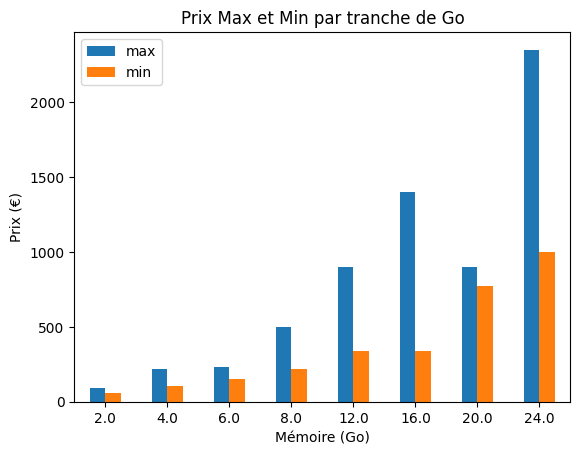

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraction du nombre de Go, avec gestion des NaN
df['Go'] = df['Infos'].str.extract(r'(\d+)\sGo')
df['Go'] = pd.to_numeric(df['Go'], errors='coerce')

# Suppression des lignes où la colonne 'Go' contient des NaN
df = df.dropna(subset=['Go'])

# Nettoyage des prix : suppression des espaces insécables, du symbole euro, et conversion en float
df['Prix'] = df['Prix'].str.replace(r'\xa0', '', regex=True).str.replace('€', '.').str.replace(' ', '').astype(float)

# Calcul des prix max et min pour chaque tranche de Go
prix_par_go = df.groupby('Go')['Prix'].agg(['max', 'min'])

# Création du graphique
prix_par_go.plot(kind='bar', y=['max', 'min'], title="Prix Max et Min par tranche de Go")
plt.ylabel('Prix (€)')
plt.xlabel('Mémoire (Go)')
plt.xticks(rotation=0)
plt.show()

In [24]:
prix_par_go

,max,min
Go,,
2.0,89.95,54.95
4.0,219.95,105.95
6.0,229.95,149.95
8.0,499.95,219.95
12.0,899.95,339.95
16.0,1399.95,339.95
20.0,899.95,769.95
24.0,2499.95,999.95


In [2]:
df.to_csv("Ldlc_10_22_2024.csv")

In [5]:
import pandas as pd

# Charger les fichiers Excel
df_day1 = pd.read_csv("Ldlc_10_19_2024.csv")  # Nom du fichier pour le premier jour
df_day2 = pd.read_csv("Ldlc_10_25_2024.csv")  # Nom du fichier pour le deuxième jour

# Comparer les noms pour identifier les nouvelles cartes ajoutées
new_cards = df_day2[~df_day2['Nom'].isin(df_day1['Nom'])]

# Comparer les noms pour identifier les cartes supprimées (enlevées)
removed_cards = df_day1[~df_day1['Nom'].isin(df_day2['Nom'])]

# Comparer les prix pour identifier les cartes avec un changement de prix
merged = pd.merge(df_day1[['Nom', 'Prix']], df_day2[['Nom', 'Prix']], on='Nom', how='inner', suffixes=('_day1', '_day2'))
price_changed = merged[merged['Prix_day1'] != merged['Prix_day2']]

# Afficher les résultats
print(f"Nouvelles cartes ajoutées :\n{new_cards}\n")
print(f"Cartes supprimées (enlevées) :\n{removed_cards}\n")
print(f"Cartes avec des changements de prix :\n{price_changed}\n")


Nouvelles cartes ajoutées :
Empty DataFrame
Columns: [Unnamed: 0, Nom, Infos, Prix, Date]
Index: []

Cartes supprimées (enlevées) :
     Unnamed: 0                                                Nom  \
8             8  ASRock AMD Radeon RX 7700 XT Phantom Gaming 12...   
33           33  ASUS DUAL Radeon RX 7900 GRE OC Edition 16GB G...   
59           59               ASUS ROG Strix GeForce RTX 4090 24GB   
60           60  ASUS ROG Strix GeForce RTX 4090 BTF OC Edition...   
61           61    ASUS ROG Strix GeForce RTX 4090 OC Edition 24GB   
65           65   ASUS TUF Gaming GeForce RTX 4090 OC Edition 24GB   
66           66  ASUS TUF Gaming GeForce RTX 4090 OC OG Edition...   
78           78         Gainward GeForce RTX 4070 Ti SUPER Phantom   
86           86                  Gainward GeForce RTX 4090 Phantom   
126         126    Gigabyte GeForce RTX 4090 XTREME WATERFORCE 24G   
175         175    MSI GeForce RTX 4060 Ti GAMING X SLIM WHITE 16G   
177         177  MSI GeForce

In [5]:
removed_cards["Nom"]

33     ASUS DUAL Radeon RX 7900 GRE OC Edition 16GB G...
78            Gainward GeForce RTX 4070 Ti SUPER Phantom
187          Sapphire NITRO+ AMD Radeon RX 7900 GRE 16GB
Name: Nom, dtype: object